<a href="https://colab.research.google.com/github/Mumo2001/Electric-car-sharing-service./blob/master/Moringa_Data_Science_Prep_W4_Independent_Project_2020_09_Janet_Mumo_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import pandas,numpy and matplotlib libraries.

In [200]:
#Import pandas
import pandas as pd

#Import numpy
import numpy as np 

#import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


2. Load the data set.


In [6]:
df = pd.read_csv("Autolib.csv")

Preview the first 10 rows of the dataset

In [7]:
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


Access information about the Autolib dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

3. Clean the dataset.
Checking for duplicate values and missing values.The dataset has some missing files.

In [9]:
 df.isnull().sum()

Address                   0
Cars                      0
Bluecar counter           0
Utilib counter            0
Utilib 1.4 counter        0
Charge Slots              0
Charging Status           0
City                      0
Displayed comment      4889
ID                        0
Kind                      0
Geo point                 0
Postal code               0
Public name               0
Rental status             0
Scheduled at           4953
Slots                     0
Station type              0
Status                    0
Subscription status       0
year                      0
month                     0
day                       0
hour                      0
minute                    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [34]:
#drop columns with missing values.
df.drop(['Displayed comment', 'Scheduled at'], axis=1, inplace=True)

In [35]:
df.isnull().sum()

Address                0
Cars                   0
Bluecar counter        0
Utilib counter         0
Utilib 1.4 counter     0
Charge Slots           0
Charging Status        0
City                   0
ID                     0
Kind                   0
Geo point              0
Postal code            0
Public name            0
Rental status          0
Slots                  0
Station type           0
Status                 0
Subscription status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

In [36]:
df

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,2,0,0,0,nonexistent,Colombes,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,4,0,0,1,operational,Paris,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,1,0,0,1,operational,Paris,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,2,0,0,0,nonexistent,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,3,station,ok,nonexistent,2018,4,4,17,27


Find outliers in the dataset given.


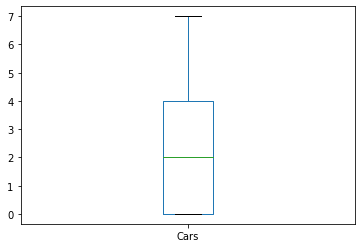

In [201]:
df.boxplot(column =['Cars'], grid = False)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


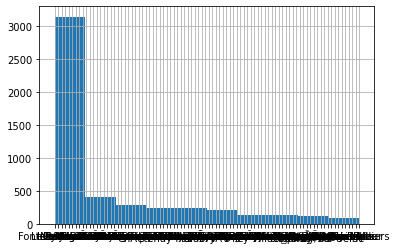

In [204]:
df.City.hist()

No outliers.

Answering questions.

In [183]:
#Find the most popular hour of the day for picking up a shared electric car in Paris over the month of April.
df_paris=df[(df['City']=='Paris') & (df['Bluecar counter']>0) & (df['Rental status']=='operational') & (df['month']==4)]
df_paris.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,0,station,ok,nonexistent,2018,4,4,15,2


In [197]:
df_popular_hour = df_paris.groupby(['hour'])['Bluecar counter'].sum().sort_values(ascending=False)
df_popular_hour.head(1)

hour
21    268
Name: Bluecar counter, dtype: int64

The most popular hour for picking up a bluecar in Paris is 21.

In [196]:
#Most popular hour for returning cars.
df_returning = df[(df['Cars']>0) & (df['Rental status']=='operational')]
df_returning.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,0,station,ok,nonexistent,2018,4,4,22,13


In [150]:
popular_hour = df_returning.groupby(['hour'])['Cars'].sum().sort_values(ascending=False)
popular_hour.head(1)

hour
6    608
Name: Cars, dtype: int64

The most popular hour of returning cars is the 6th hour.

In [95]:
#what station was the most popular.
popular_station = df['Station type'].value_counts()
popular_station

station         4615
full_station     382
subs_center        3
Name: Station type, dtype: int64

In [195]:
#what station was the most popular and at what most picking hour??
picking_hour = df.loc[(df['Utilib 1.4 counter']) & (df['Utilib counter']) & (df['Rental status']=='operational') & (df['Station type']) & (df['hour']==21)]
picking_hour.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
1218,4 Chemin des petits marais,4,4,1,1,0,operational,Gennevilliers,gennevilliers-petitsmarais-4,STATION,"48.9462, 2.303365",92230,Gennevilliers/Petits marais/4,operational,0,station,ok,nonexistent,2018,4,2,21,21
1998,29 avenue de la Sibelle,2,2,1,1,0,operational,Paris,paris-sibelle-29,STATION,"48.8249705, 2.3382509",75014,Paris/Sibelle/29,operational,0,station,ok,nonexistent,2018,4,5,21,0


The most popular station and its picking hour is station and the hour is 21.

In [192]:
postal_code['hour'].value_counts()

17    31
Name: hour, dtype: int64

In [191]:
#what postal code was the most popular for picking up blue cars?
#postal_code['hour'].value_counts()
postal_code = df.loc[(df['Bluecar counter']) & (df['Rental status']=='operational') & (df['hour']==17) & (df['Postal code'])]
postal_code['Postal code'].value_counts().head(1)

75017    10
Name: Postal code, dtype: int64

The most popular postal code is 75017 for picking up blue cars is the 17th hour.